In [1]:
#https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [93]:
import seaborn as sns
sns.set()

In [2]:
df_08 = pd.read_csv('dataset/all_alpha_08.csv')
df_18 = pd.read_csv('dataset/all_alpha_18.csv')

In [3]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [5]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [6]:
df_08['SmartWay'].unique()

array(['no', 'yes'], dtype=object)

In [7]:
df_08['Sales Area'].unique()

array(['CA', 'FA', 'FC'], dtype=object)

In [8]:
#nunique omit missing values, unlike unique
df_08['Trans'].nunique()

14

In [9]:
sum(df_08.duplicated())

25

In [10]:
sum(df_08.isnull().sum(axis =1)!=0)

199

In [11]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [12]:
sum(df_18.isnull().sum(axis =1)!=0)

2

In [13]:
sum(df_18.duplicated())

0

In [14]:
df_18['SmartWay'].unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [15]:
df_18['Cert Region'].unique()

array(['FA', 'CA'], dtype=object)

In [16]:
df_08['Cyl'].nunique()

8

In [17]:
df_18['Cyl'].nunique()

7

In [18]:
df_08['Fuel'].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [19]:
df_18['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

In [20]:
#check columns
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [21]:
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

In [22]:
drop_08 = ['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG']
drop_18=['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2']

In [23]:
df_08.drop(columns= drop_08, inplace=True)
df_18.drop(columns=drop_18, inplace=True)

In [24]:
df_08.rename(columns = {'Sales Area':'Cert Region'}, inplace=True)

In [25]:
for col in df_08.columns:
    new_col = col.lower().replace(" ","_")
    df_08.rename(columns={col:new_col}, inplace=True)
df_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [26]:
for col in df_18.columns:
    new_col = col.lower().replace(" ","_")
    df_18.rename(columns={col:new_col}, inplace=True)
df_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


# 1. Filter

For consistency, only compare cars certified by California standards.

In [27]:
df_08 = df_08.query('cert_region == "CA"')
df_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7,17,26,20,6,yes


In [28]:
df_18= df_18.query('cert_region == "CA"')
df_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,CA,small car,3,21,30,24,5,No


In [37]:
df_08.drop(columns = 'cert_region', inplace=True)
df_18.drop(columns='cert_region', inplace=True)

In [38]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 2400
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 986 non-null    object 
 1   displ                 986 non-null    float64
 2   cyl                   986 non-null    object 
 3   trans                 986 non-null    object 
 4   drive                 986 non-null    object 
 5   fuel                  986 non-null    object 
 6   veh_class             986 non-null    object 
 7   air_pollution_score   986 non-null    object 
 8   city_mpg              986 non-null    object 
 9   hwy_mpg               986 non-null    object 
 10  cmb_mpg               986 non-null    object 
 11  greenhouse_gas_score  986 non-null    object 
 12  smartway              986 non-null    object 
dtypes: float64(1), object(12)
memory usage: 107.8+ KB


In [39]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 1609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 794 non-null    object 
 1   displ                 794 non-null    float64
 2   cyl                   794 non-null    float64
 3   trans                 794 non-null    object 
 4   drive                 794 non-null    object 
 5   fuel                  794 non-null    object 
 6   veh_class             794 non-null    object 
 7   air_pollution_score   794 non-null    int64  
 8   city_mpg              794 non-null    object 
 9   hwy_mpg               794 non-null    object 
 10  cmb_mpg               794 non-null    object 
 11  greenhouse_gas_score  794 non-null    int64  
 12  smartway              794 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 86.8+ KB


In [31]:
df_08.dropna(inplace = True)

In [32]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1009 non-null   object 
 1   displ                 1009 non-null   float64
 2   cyl                   1009 non-null   object 
 3   trans                 1009 non-null   object 
 4   drive                 1009 non-null   object 
 5   fuel                  1009 non-null   object 
 6   cert_region           1009 non-null   object 
 7   veh_class             1009 non-null   object 
 8   air_pollution_score   1009 non-null   object 
 9   city_mpg              1009 non-null   object 
 10  hwy_mpg               1009 non-null   object 
 11  cmb_mpg               1009 non-null   object 
 12  greenhouse_gas_score  1009 non-null   object 
 13  smartway              1009 non-null   object 
dtypes: float64(1), object(13)
memory usage: 118.2+ KB


In [33]:
df_18.dropna(inplace=True)

In [34]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 1 to 1609
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 797 non-null    object 
 1   displ                 797 non-null    float64
 2   cyl                   797 non-null    float64
 3   trans                 797 non-null    object 
 4   drive                 797 non-null    object 
 5   fuel                  797 non-null    object 
 6   cert_region           797 non-null    object 
 7   veh_class             797 non-null    object 
 8   air_pollution_score   797 non-null    int64  
 9   city_mpg              797 non-null    object 
 10  hwy_mpg               797 non-null    object 
 11  cmb_mpg               797 non-null    object 
 12  greenhouse_gas_score  797 non-null    int64  
 13  smartway              797 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 93.4+ KB


In [35]:
df_08.drop_duplicates(inplace=True)

In [36]:
df_18.drop_duplicates(inplace=True)

# fixing datatypes

In [65]:
#fix cyl datatype
#extract int from string in 2008
df_08['cyl'] = df_08['cyl'].map(lambda x : x.split()[0][1:])

In [69]:
df_18['cyl'] = df_18['cyl'].astype('int')

In [74]:
df_08['air_pollution_score']

0       7
2       7
4       7
6       7
7       7
       ..
2394    7
2396    7
2398    7
2399    7
2400    7
Name: air_pollution_score, Length: 986, dtype: object

In [76]:
#fix air_pollution_score
#convert string to float in 2008

In [78]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [79]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [80]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [81]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [82]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [83]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [85]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
    
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)

# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [86]:
# convert string to float for 2008 air pollution column
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)
# convert int to float for 2018 air pollution column
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

In [87]:
#fix city_mpg, hwy_mpg, cmb_mpg
cols = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for col in cols:
    df_08[col] = df_08[col].astype('float')
    df_18[col] = df_18[col].astype('float')

In [88]:
#fix greenhouse_gas_score in 2008
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype('int')

In [89]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    object 
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    float64
 9   hwy_mpg               987 non-null    float64
 10  cmb_mpg               987 non-null    float64
 11  greenhouse_gas_score  987 non-null    int64  
 12  smartway              987 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 100.4+ KB


In [90]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 832 non-null    object 
 1   displ                 832 non-null    float64
 2   cyl                   832 non-null    int64  
 3   trans                 832 non-null    object 
 4   drive                 832 non-null    object 
 5   fuel                  832 non-null    object 
 6   veh_class             832 non-null    object 
 7   air_pollution_score   832 non-null    float64
 8   city_mpg              832 non-null    float64
 9   hwy_mpg               832 non-null    float64
 10  cmb_mpg               832 non-null    float64
 11  greenhouse_gas_score  832 non-null    int64  
 12  smartway              832 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 84.6+ KB


# use visualization

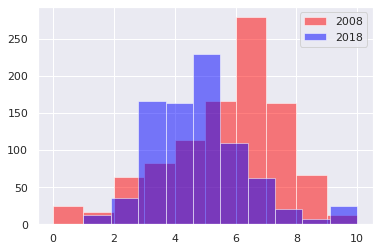

In [99]:
df_08['greenhouse_gas_score'].hist(color='red', alpha=0.5)
df_18['greenhouse_gas_score'].hist(color='blue', alpha=0.5)
plt.legend(['2008', '2018'])

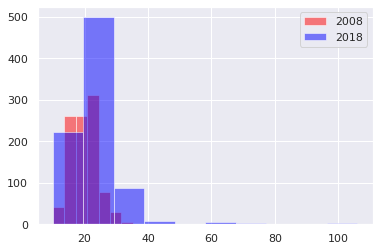

In [103]:
df_08['cmb_mpg'].hist(color='red', alpha=0.5)
df_18['cmb_mpg'].hist(color='blue', alpha=0.5)
plt.legend(['2008', '2018'])

Text(0.5, 1.0, 'correlation between diplacment and combined mpg')

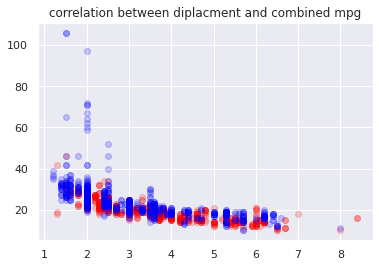

In [110]:
plt.scatter(df_08['displ'], df_08['cmb_mpg'], color='red', alpha=0.2)
plt.scatter(df_18['displ'], df_18['cmb_mpg'], color='blue', alpha=0.2)
plt.title("correlation between diplacment and combined mpg")

Text(0.5, 1.0, 'correlation between gas score and combined mpg')

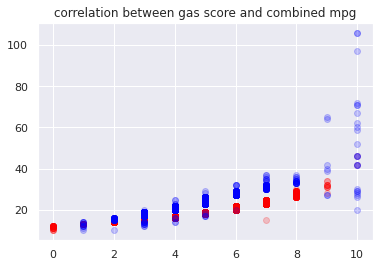

In [111]:
plt.scatter(df_08['greenhouse_gas_score'], df_08['cmb_mpg'], color='red', alpha=0.2)
plt.scatter(df_18['greenhouse_gas_score'], df_18['cmb_mpg'], color='blue', alpha=0.2)
plt.title("correlation between gas score and combined mpg")

# Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?


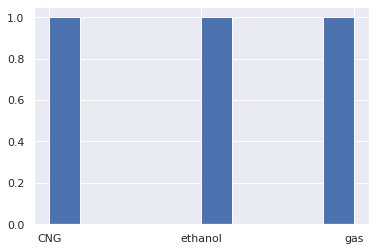

<AxesSubplot:>

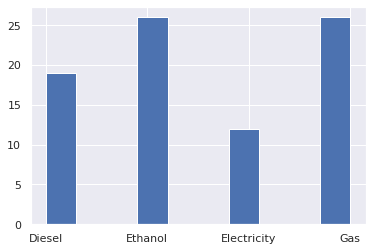

In [135]:
df_08[df_08['fuel'] != 'Gasoline']['fuel'].hist()
plt.show()
df_18[df_18['fuel'] != 'Gasoline']['fuel'].hist()

In [127]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [128]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

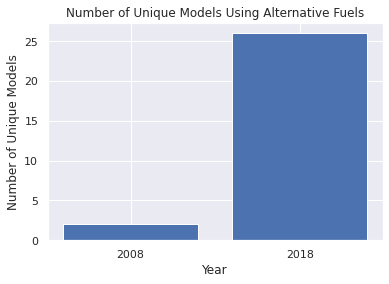

In [129]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

# Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?


In [136]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [137]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [138]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

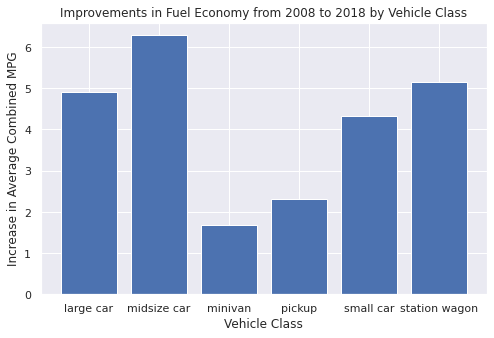

In [139]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

# Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)


In [140]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [141]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')
# explore smartway vehicles in 2008
smart_08.describe()

,displ,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [142]:
# smartway labels for 2018
df_18.smartway.unique()
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


# Q4: What features are associated with better fuel economy (mpg)? 

In [143]:
#select all vehicles that have the top 50% fuel economy ratings
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [144]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


# Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [153]:
df_08.rename(columns= lambda x: x[:10]+"_2008", inplace =True)
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [154]:
df_18.rename(columns= lambda x: x[:10]+"_2018", inplace =True)
df_18.head()

,model_2018,displ_2018,cyl_2018,trans_2018,drive_2018,fuel_2018,veh_class_2018,air_pollut_2018,city_mpg_2018,hwy_mpg_2018,cmb_mpg_2018,greenhouse_2018,smartway_2018
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


In [158]:
#df_merged = df_08.merge(df_18, on='model', suffixes= ['_2008', "_2018"])
df_merged = df_08.merge(df_18,left_on='model_2008', right_on='model_2018')
df_merged.rename(columns={'model_2008':'model'}, inplace=True)
df_merged.head()

,model,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans_2018,drive_2018,fuel_2018,veh_class_2018,air_pollut_2018,city_mpg_2018,hwy_mpg_2018,cmb_mpg_2018,greenhouse_2018,smartway_2018
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [161]:
model_mpg = df_merged.groupby('model')[['cmb_mpg_2008','cmb_mpg_2018']].mean()

In [162]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg_2018
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [163]:
model_mpg['model_change'] = model_mpg['cmb_mpg_2018'] -model_mpg['cmb_mpg_2008']
model_mpg.head()

,cmb_mpg_2008,cmb_mpg_2018,model_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


In [164]:
model_mpg[model_mpg['model_change'] == model_mpg['model_change'].max()]

,cmb_mpg_2008,cmb_mpg_2018,model_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333
